<h1>
    <font color=0000FF>
        6.4 Supervised Machine Learning:  Regression 
    </font>
</h1>

___

## This script contains the following:

### 1. Importing libraries and data

### 2. Data cleaning

### 3. Data prep for regression analysis

### 4. Regression analysis

* **A. Hypothesis: The higher the gdp_per_capita , the lower will be suicide rates.
[GDP per capita vs. Suicide rates]**

* **B. Hypothesis: The higher the HDI for year, the lower will be suicide rates.
[HDI for year vs Suicide rates]**

* **C. Hypothesis: The higher the gdp per capita, the lower will be the count of suicides.
[GDP_per_ capita vs count of suicides]**

* **D. The higher the population, the higher the count of suicides
[Population vs. count of suicides]**

### 5. Exporting dataset

___

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Turn project folder path into a string

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [4]:
# Define path

path = r'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [5]:
path

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [6]:
# Import the global suicides data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'master.csv'), index_col = False)

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


___

### 2. Data Cleaning

In [8]:
# Renaming column suicides_no to count of suicides
# Renaming column suicides/100k pop to suicide rate
df.rename(columns = {'suicides_no' : 'count of suicides'}, inplace = True)
df.rename(columns = {'suicides/100k pop' : 'suicide rate'}, inplace = True)

In [9]:
df.head(10)

,country,year,sex,age,count of suicides,population,suicide rate,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [12]:
#Drop columns 

#Dropping column'country-year' as it's a composite key of country and year variable from df

df = df.drop(columns = ['country-year'])

In [13]:
df.head()

,country,year,sex,age,count of suicides,population,suicide rate,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [14]:
df.columns

Index(['country', 'year', 'sex', 'age', 'count of suicides', 'population',
       'suicide rate', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [15]:
df.describe()

,year,count of suicides,population,suicide rate,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
# Creating a subset for visualization
view_map = df[['country', 'Total_suicide_count']]

##### Missing values

In [26]:
# Check for missing values

df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
count of suicides     0
population            0
suicide rate          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [17]:
# Fill missing values for HDI for year with mean 

df.fillna({"HDI for year":df['HDI for year'].mean()},inplace=True)
print(df)

          country  year     sex          age  count of suicides  population  \
0         Albania  1987    male  15-24 years                 21      312900   
1         Albania  1987    male  35-54 years                 16      308000   
2         Albania  1987  female  15-24 years                 14      289700   
3         Albania  1987    male    75+ years                  1       21800   
4         Albania  1987    male  25-34 years                  9      274300   
...           ...   ...     ...          ...                ...         ...   
27815  Uzbekistan  2014  female  35-54 years                107     3620833   
27816  Uzbekistan  2014  female    75+ years                  9      348465   
27817  Uzbekistan  2014    male   5-14 years                 60     2762158   
27818  Uzbekistan  2014  female   5-14 years                 44     2631600   
27819  Uzbekistan  2014  female  55-74 years                 21     1438935   

       suicide rate  HDI for year  gdp_for_year ($)

In [18]:
# Recheck for missing values

df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
count of suicides     0
population            0
suicide rate          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

##### Duplicates check

In [19]:
dups = df.duplicated()

In [20]:
dups.shape # No dups

(27820,)

##### Extreme values checks

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='Density'>

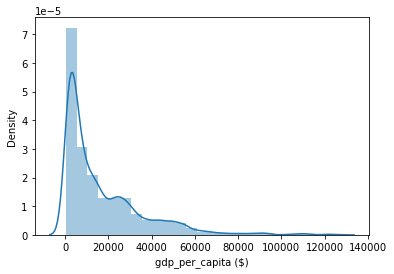

In [21]:
# Shows extreme values

sns.distplot(df['gdp_per_capita ($)'], bins=25)

In [22]:
# Check the mean

df['gdp_per_capita ($)'].mean()

16866.464414090584

In [23]:
# Check the median 

df['gdp_per_capita ($)'].median()

9372.0

In [24]:
# Check the max

df['gdp_per_capita ($)'].max()

126352

In [25]:
# Check the min

df['gdp_per_capita ($)'].min()

251

___

### 3. Data prep for regression analysis

#### A. Hypothesis: The higher the gdp_per_capita ($), the lower will be suicide rates.

#### GDP per capita ($) vs. Suicide rates

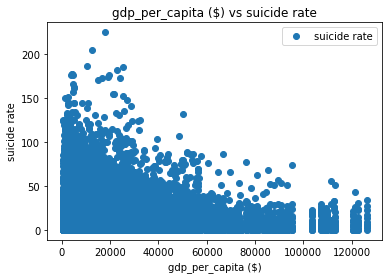

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita ($)', y='suicide rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('gdp_per_capita ($) vs suicide rate')  
plt.xlabel('gdp_per_capita ($)')  
plt.ylabel('suicide rate')  
plt.show()

**Hypothesis: The higher the gdp_per_capita ($), the lower will be suicide rates.**

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita ($)'].values.reshape(-1,1)
y = df['suicide rate'].values.reshape(-1,1)

In [35]:
X

array([[ 796],
       [ 796],
       [ 796],
       ...,
       [2309],
       [2309],
       [2309]])

In [36]:
y

array([[6.71],
       [5.19],
       [4.83],
       ...,
       [2.17],
       [1.67],
       [1.46]])

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

___

#### B. Hypothesis: The higher the HDI for year, the lower will be suicide rates.

#### HDI for year vs Suicide rates

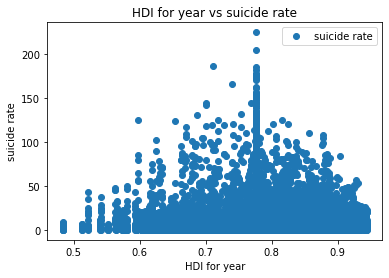

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'HDI for year', y='suicide rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('HDI for year vs suicide rate')  
plt.xlabel('HDI for year')  
plt.ylabel('suicide rate')  
plt.show()

**Hypothesis: The higher the HDI for year, the lower will be suicide rates.**

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df['HDI for year'].values.reshape(-1,1)
y2 = df['suicide rate'].values.reshape(-1,1)

In [40]:
X2

array([[0.77660115],
       [0.77660115],
       [0.77660115],
       ...,
       [0.675     ],
       [0.675     ],
       [0.675     ]])

In [41]:
y2

array([[6.71],
       [5.19],
       [4.83],
       ...,
       [2.17],
       [1.67],
       [1.46]])

In [42]:
# Split data into a training set and a test set

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

___

**C. Hypothesis: The higher the gdp per capita ($), the lower will be the count of suicides.**

**GDP_per_ capita($) vs count of suicides**

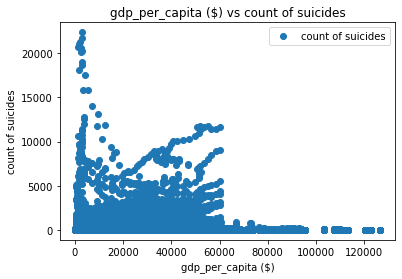

In [70]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita ($)', y='count of suicides',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('gdp_per_capita ($) vs count of suicides')  
plt.xlabel('gdp_per_capita ($)')  
plt.ylabel('count of suicides')  
plt.show()

In [71]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X3 = df['gdp_per_capita ($)'].values.reshape(-1,1)
y3 = df['count of suicides'].values.reshape(-1,1)

In [72]:
X3

array([[ 796],
       [ 796],
       [ 796],
       ...,
       [2309],
       [2309],
       [2309]])

In [73]:
y3

array([[21],
       [16],
       [14],
       ...,
       [60],
       [44],
       [21]])

In [74]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

___

**D. Hypothesis: The higher the population, the higher will be the count of suicides.**

**Population vs count of suicides**

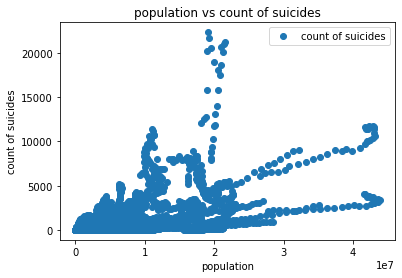

In [79]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'population', y='count of suicides',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('population vs count of suicides')  
plt.xlabel('population')  
plt.ylabel('count of suicides')  
plt.show()

In [80]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X4 = df['population'].values.reshape(-1,1)
y4 = df['count of suicides'].values.reshape(-1,1)

In [81]:
X4

array([[ 312900],
       [ 308000],
       [ 289700],
       ...,
       [2762158],
       [2631600],
       [1438935]])

In [82]:
y4

array([[21],
       [16],
       [14],
       ...,
       [60],
       [44],
       [21]])

In [83]:
# Split data into a training set and a test set.

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

___

___

### 4. Regression Analysis

**A. GDP per capita ($) vs. Suicide rates** 

In [43]:
# Create a regression object.

regression = LinearRegression()

In [44]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

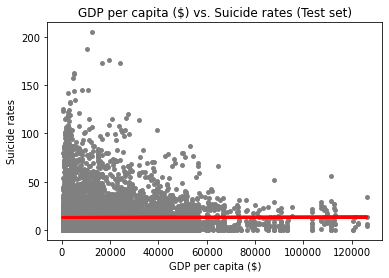

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita ($) vs. Suicide rates (Test set)')
plot_test.xlabel('GDP per capita ($)')
plot_test.ylabel('Suicide rates')
plot_test.show()

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [48]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.61746751e-06]]
Mean squared error:  346.9700583671453
R2 score:  -0.0005866175749895675


**It is a straight line meaning that there is no relationship between these two variables as per the regression analysis. However, looking at the graph, we can clearly see that there is a negative relationship. The MSE is high at 346, so the regression line is not an exact representation of the data. The R2 score of -0.0000586 shows that the model fits worse than a horizontal line.** 

In [49]:
y_predicted

array([[12.8965924 ],
       [12.97279435],
       [12.92197978],
       ...,
       [12.90948505],
       [12.94213631],
       [13.05624932]])

In [50]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.31,12.896592
1,42.77,12.972794
2,0.88,12.921980
3,43.67,12.890522
4,8.87,12.899696
5,4.00,12.891470
6,1.35,12.955763
7,44.31,12.991967
8,2.33,12.905459
9,0.40,13.091125


##### Compare how the regression fits the training set

In [51]:
# predict

y_predicted_train = regression.predict(X_train) 

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.61746751e-06]]
Mean squared error:  364.9318643648967
R2 score:  1.27380524453935e-05


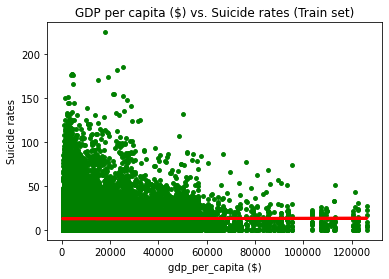

In [56]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita ($) vs. Suicide rates (Train set)')
plot_test.xlabel('gdp_per_capita ($)')
plot_test.ylabel('Suicide rates')
plot_test.show()

**B. HDI for year vs Suicide rates**

In [57]:
# Create a regression object.

regression = LinearRegression()

In [58]:
# fit the regression object onto the training set

regression.fit(X2_train, y2_train)

LinearRegression()

In [59]:
# predict the values of y using X

y2_predicted = regression.predict(X2_test)

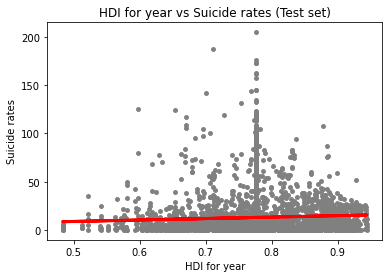

In [60]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('HDI for year vs Suicide rates (Test set)')
plot_test.xlabel('HDI for year')
plot_test.ylabel('Suicide rates')
plot_test.show()

In [61]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y2_test, y2_predicted) 
r2 = r2_score(y2_test, y2_predicted)

In [62]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.09938097]]
Mean squared error:  346.673770178952
R2 score:  0.00026781348873661237


**The slope falls flat indicating a weak positive relationship. The MSE is high at 346.6, so the regression line is not an exact representation of the data. The R2 score of 0.0002 represents a poor fit.**

In [63]:
y2_predicted

array([[11.09003799],
       [14.47229932],
       [12.94123942],
       ...,
       [11.34672746],
       [13.20395132],
       [12.94123942]])

In [64]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.31,11.090038
1,42.77,14.472299
2,0.88,12.941239
3,43.67,12.941239
4,8.87,12.941239
5,4.00,12.941239
6,1.35,13.354945
7,44.31,12.941239
8,2.33,12.041299
9,0.40,12.941239


##### Compare how the regression fits the training set

In [65]:
# predict

y2_predicted_train = regression.predict(X2_train)

In [66]:
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2 = r2_score(y2_train, y2_predicted_train)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.09938097]]
Mean squared error:  364.348424110958
R2 score:  0.0016114825826374357


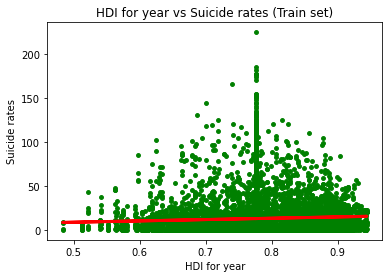

In [68]:
# visualizing the training set results

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('HDI for year vs Suicide rates (Train set)')
plot_test.xlabel('HDI for year')
plot_test.ylabel('Suicide rates')
plot_test.show()

___

**C. GDP_per_ capita($) vs count of suicides**

In [75]:
# Create a regression object.

regression = LinearRegression()

In [76]:
# Fit the regression object onto the training set

regression.fit(X3_train, y3_train)

LinearRegression()

In [77]:
# predict the values of y using X

y3_predicted = regression.predict(X3_test)

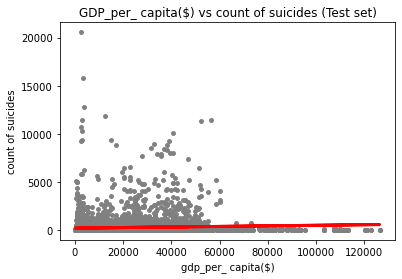

In [78]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('GDP_per_ capita($) vs count of suicides (Test set)')
plot_test.xlabel('gdp_per_ capita($)')
plot_test.ylabel('count of suicides')
plot_test.show()

In [98]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y3_test, y3_predicted) 
r2 = r2_score(y3_test, y3_predicted)

In [99]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014528]]
Mean squared error:  652600.3189866436
R2 score:  0.004250345804310718


In [100]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,453,205.822170
1,134,267.743982
2,38,226.451995
3,650,200.889590
4,1,208.344312
5,16,201.659754
6,2,253.904538
7,721,283.323645
8,39,213.027029
9,2,363.899898


##### Predict how the regresssion fits the training model

In [101]:
# predict

y3_predicted_train = regression.predict(X3_train)

In [102]:
rmse = mean_squared_error(y3_train, y3_predicted_train)
r2 = r2_score(y3_train, y3_predicted_train)

In [103]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014528]]
Mean squared error:  952018.33304125
R2 score:  -0.08010009001207741


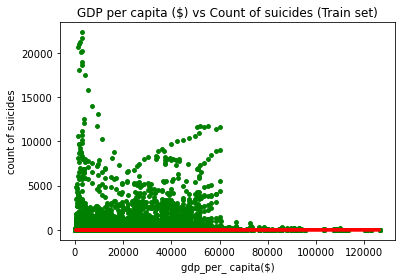

In [104]:
# visualizing the training set results

plot_test = plt
plot_test.scatter(X3_train, y3_train, color='green', s = 15)
plot_test.plot(X3_train, y3_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita ($) vs Count of suicides (Train set)')
plot_test.xlabel('gdp_per_ capita($)')
plot_test.ylabel('count of suicides')
plot_test.show()

**Looking at the horizontal line for regression analysis in the chart above, it seems like there is no relationship between the two variables.**

___

**D. The higher the population, the higher the count of suicides.** 

**Population vs. count of suicides**

In [85]:
# Create a regression object.

regression = LinearRegression()

In [86]:
# Fit the regression object onto the training set

regression.fit(X4_train, y4_train)

LinearRegression()

In [87]:
# predict the values of y using X

y4_predicted = regression.predict(X4_test)

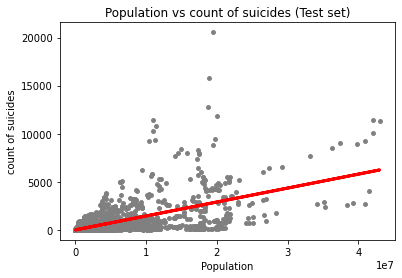

In [89]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X4_test, y4_test, color='gray', s = 15)
plot_test.plot(X4_test, y4_predicted, color='red', linewidth =3)
plot_test.title('Population vs count of suicides (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('count of suicides')
plot_test.show()

In [90]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y4_test, y4_predicted) 
r2 = r2_score(y4_test, y4_predicted)

In [91]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014528]]
Mean squared error:  393893.42656653526
R2 score:  0.39899011403699614


In [92]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,453,616.688815
1,134,24.166453
2,38,603.526662
3,650,194.868097
4,1,-19.711652
5,16,36.781049
6,2,0.106178
7,721,215.054501
8,39,222.101415
9,2,51.341514


##### Predict how the regresssion fits the training model

In [93]:
# predict

y4_predicted_train = regression.predict(X4_train)

In [94]:
rmse = mean_squared_error(y4_train, y4_predicted_train)
r2 = r2_score(y4_train, y4_predicted_train)

In [95]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014528]]
Mean squared error:  552506.6003376663
R2 score:  0.3731607805801328


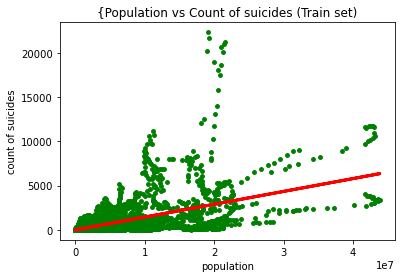

In [97]:
# visualizing the training set results

plot_test = plt
plot_test.scatter(X4_train, y4_train, color='green', s = 15)
plot_test.plot(X4_train, y4_predicted_train, color='red', linewidth =3)
plot_test.title('Population vs Count of suicides (Train set)')
plot_test.xlabel('population')
plot_test.ylabel('count of suicides')
plot_test.show()

**As population increases, the count of suicides increases as well. However due to the high MSE and low R2 score, this model is not viable for making predictions.** 

___

### 5. Exporting dataset

In [105]:
# Export data to csv
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'master_clean_6.4.csv'))